In [1]:
from ImageAlgoKD import *

## 1. Load Toy Data Points

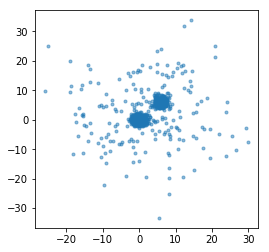

In [21]:
KERNEL_R = 1

points = Points_KDBin(np.genfromtxt("../data/basic.csv",delimiter=','),KERNEL_R)

# basic = np.genfromtxt("../data/basic.csv",delimiter=',')
# data = basic
# for i in range(12):
#     theta = 6.26*i/12
#     data = np.r_[data,basic+20*np.array([np.cos(theta),np.sin(theta)])]
# points = Points_KDBin(data,KERNEL_R)

# plot toy points
plt.figure(figsize=(4,4),facecolor="w")
plt.plot( points.cords[:,0],points.cords[:,1], ".",alpha=0.5 )

## 2. Define Clustering Parameters

In [22]:
# define clustering parameters
ia = ImageAlgoKD(MAXDISTANCE        = 20,
                 KERNEL_R           = KERNEL_R,
                 KERNEL_R_NORM      = 1.0,
                 KERNEL_R_POWER     = 0.0,
                 DECISION_RHO_KAPPA = 5.0,
                 DECISION_NHD       = 2.0,
                 CONTINUITY_NHD     = 2.0)

ia.setInputsPoints(points)
# run
ia.run("cudabin",1,blockSize=64)

clustering finished!
Run time with cudabin is 11.3522 ms, in which rho time is  3.9215 ms


## 3. Run and Plot Result

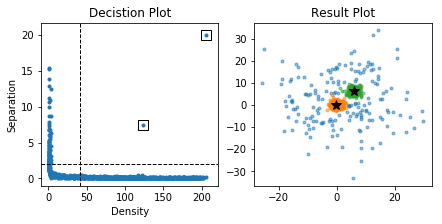

In [23]:
# plot result
plt.figure(figsize=(7,3),facecolor="w")

plt.subplot(1,2,1)
x,y,slt = ia.points.rho, ia.points.nhd, ia.points.isSeed
plt.plot(x,y, ".")
plt.scatter( x[slt], y[slt], marker="s", s=100, facecolors='none', edgecolors="k")

plt.axvline(ia.DECISION_RHO,color='k',linestyle="--",linewidth=1)
plt.axhline(ia.DECISION_NHD,color='k',linestyle="--",linewidth=1)
plt.xlabel("Density")
plt.ylabel("Separation")
plt.title("Decistion Plot")

plt.subplot(1,2,2)
for icluster in np.unique(ia.points.clusterID):
    sl = ia.points.clusterID==icluster
    x,y = ia.points.cords[sl,0],ia.points.cords[sl,1]
    plt.plot( x, y, ".",alpha=0.5)
x,y = ia.points.cords[slt,0],ia.points.cords[slt,1]
plt.plot( x, y, "k*", markersize=10)

plt.title("Result Plot")
plt.savefig("../plots/basic.png",dpi=300)

## 4. Check Opencl and Numpy Gives Consistent Result

In [20]:
ia.run("numpy")
id1 = ia.points.clusterID
ia.run("numpybin")
id2 = ia.points.clusterID

ia.run("cuda",1,blockSize=32)
id3 = ia.points.clusterID
ia.run("cudabin",1,blockSize=32)
id4 = ia.points.clusterID

# ia.run("opencl",1,blockSize=64)
# id3 = ia.points.clusterID
# ia.run("openclbin",1,blockSize=64)
# id4 = ia.points.clusterID

identical = (id1==id2) & (id1==id3) & (id1==id4)
identical.all()

clustering finished!
Run time with numpy is 7595.8986 ms, in which rho time is 3591.3422 ms
clustering finished!
Run time with numpybin is 1879.1964 ms, in which rho time is 681.0446 ms
clustering finished!
Run time with cuda is 21.9771 ms, in which rho time is  9.8759 ms
clustering finished!
Run time with cudabin is 13.1532 ms, in which rho time is  0.8497 ms


True